In [1]:
#Presentacion:
#DataHouse es una empresa reconocida en el rubro de consultoría relacionada al Data Science. Brinda servicios de Machine
#Learning, Big Data, Database Services, consultoría, analítica entre otros.

In [33]:
#PREGUNTAS Y OBJETIVOS DE LA INVESTIGACION
#Esta vez fue contratada, dada su reputación, por la empresa Netflix. La misma necesita un análisis exhaustivo
#para la producción de futuras películas, maximizando las recaudaciones, disminuyendo los presupuestos, acrecentando la base 
#de espectadores y manteniendo la popularidad por la que tanto destacó en los últimos años. A su vez, busca poder mejorar 
#su algoritmo de recomendación de películas, ya que en el último tiempo notó como el auge de otras plataformas de streaming 
#mermaron su caudal de clientes.
#Para ello, nos basaremos en un amplio dataset histórico de películas actuales. El análisis se centrará en entender las
#distintas variables que permitieron que estos filmes hayan tenido la popularidad, el buen recibimiento y la 
#recaudación dada. 
#Los objetos de estudios que se pondrán en valoración serán las mediciones de popularidad, de votación 
#directores, productoras, países de lanzamiento, lenguaje, género, reparto, presupuestos, entre otros.

In [ ]:
#CONFORMACIÓN DEL EQUIPO DE TRABAJO
#-BAINER, Rodrigo
#-MAGARIÑOS, Nicolas

In [ ]:
#INDICACIÓN DE LA FUENTE DEL DATASET Y CRITERIOS DE SELECCIÓN (DATA ACQUISITION)
#Ubicación del dataset: https://drive.google.com/drive/u/0/folders/1hfEX7_24OryGrbowXweep1zKcEfptOt6
#Para seleccionar el dataset primero se planificó que tipo de datos necesitamos. Se entiende que la recaudación de
#una película es multicausal, por lo que se precisó encontrar un dataset con la mayor cantidad de variables que
#permitan realizar un análisis y una predicción acertada para la elaboración de nuevos filmes.
#La empresa se ofreció a brindar su base de datos propia de películas para el análisis, pero debido a
#la “escasa” variedad de películas exitosas en la plataforma, se optó por buscar una mas general enfocada en
#el reconocimiento de estas y transversal a todas las plataformas de hoy en día.

In [ ]:
#El Data Wrangling, EDA y la informacion contada con los datos se encuentra a continuacion en el notebook.

In [ ]:
#El objetivo para trabajar el DATAFRAME es poder determinar que generos de peliculas, lenguajes, directores entre otros
#parametros, son mas abundantes y mejor puntuados a la hora de producir nuevo contenido para la plataforma.

In [12]:
import numpy as np
import pandas as pd
import pandas_profiling
pd.options.display.max_columns = None
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_movies = pd.read_csv(r'C:\Users\Rodrigo\Desktop\Proyecto Final\movie_dataset.csv', sep=',')
df_movies.set_index('index', inplace = True)

In [5]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
index,,,,,,,,,,,,,,,,,,,,,,,
0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
#cantidad de columnas y filas del dataframe

df_movies.shape

(4803, 23)

In [7]:
#se modifica el formato de la fecha a DATETIME

df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], format='%Y-%m-%d')

In [8]:
#tipos de datos

df_movies.dtypes

budget                           int64
genres                          object
homepage                        object
id                               int64
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
cast                            object
crew                            object
director                        object
dtype: object

In [9]:
#recuento de filas por cada columna
df_movies.count()

budget                  4803
genres                  4775
homepage                1712
id                      4803
keywords                4391
original_language       4803
original_title          4803
overview                4800
popularity              4803
production_companies    4803
production_countries    4803
release_date            4802
revenue                 4803
runtime                 4801
spoken_languages        4803
status                  4803
tagline                 3959
title                   4803
vote_average            4803
vote_count              4803
cast                    4760
crew                    4803
director                4773
dtype: int64

In [10]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4775 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4391 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

In [11]:
profile = pandas_profiling.ProfileReport(df_movies)
profile

NameError: name 'pandas_profiling' is not defined

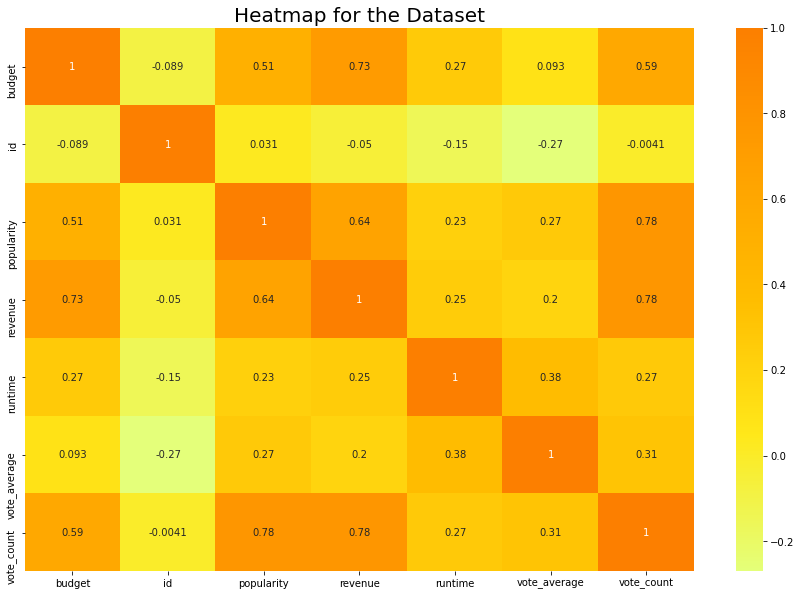

In [21]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df_movies.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

In [13]:
#se verifican las columnas con datos vacios
df_movies.isna().sum()

budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [14]:
#se filtran las filas de valores vacios en las columnas CAST y DIRECTOR
df_movies = df_movies.dropna(subset=["cast", "director"])

In [15]:
#se verifican si hay valores duplicados
df_movies.duplicated()

index
0       False
1       False
2       False
3       False
4       False
        ...  
4798    False
4799    False
4800    False
4801    False
4802    False
Length: 4751, dtype: bool

In [16]:
df_movies.director.describe()

count                 4751
unique                2329
top       Steven Spielberg
freq                    27
Name: director, dtype: object

C:\Users\Rodrigo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rodrigo\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='vote_average'>

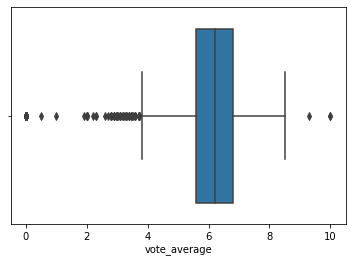

In [17]:
#se puede observar en que rangos se distribuyen mayormente las calificaciones teniendo un sesgo hacia la derecha

from seaborn import boxplot
boxplot(df_movies.vote_average, orient="v")

C:\Users\Rodrigo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Valores de puntuacion mas abundantes'}, xlabel='vote_average', ylabel='count'>

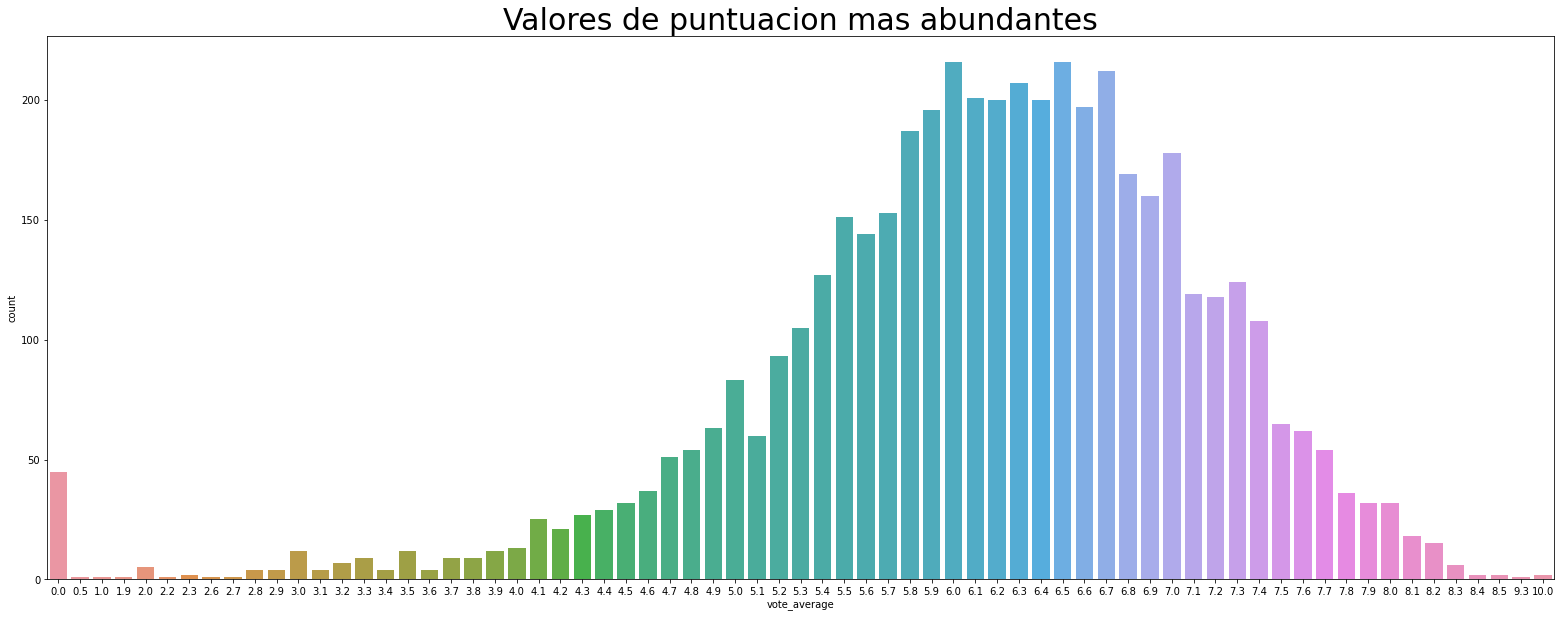

In [22]:
#visualizamos especificamente cada puntuacion en el grafico de manera mas clara

fig, ax = plt.subplots(figsize = (27,10))
plt.title('Valores de puntuacion mas abundantes', fontsize = 30, fontweight = 30)
sns.countplot(df_movies['vote_average'])

In [ ]:
#En el grafico de barras de arriba podemos observar como el promedio de puntaje ronda entre los 5.0 y los 8.0
#con un sesgo hacia la derecha. Lo que deberemos tratar es encontrar las variables que nos permitan en lo posible superar
#ese sesgo hacia delante.

In [23]:
#se observan las cantidades de las 5 puntuaciones mas abundantes

df_movies['vote_average'].value_counts().head(5)

6.0    216
6.5    216
6.7    212
6.3    207
6.1    201
Name: vote_average, dtype: int64

Text(0.5, 1.0, 'Relacion entre cantidad de votos y popularidad')

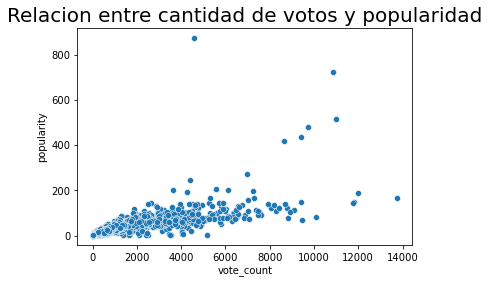

In [24]:
#se visualiza la relacion entre la popularidad de la pelicula y la cantidad de votos de la misma

sns.scatterplot(x="vote_count", y="popularity", data=df_movies)
plt.title('Relacion entre cantidad de votos y popularidad', fontsize = 20, fontweight = 30)

In [ ]:
#En esta visualizacion puede inferirse que a una mayor cantidad de votos, la pelicula presenta una mayor popularidad.
#Esto podria dar la pauta de hacer enfoque en campañas para que la gente vote y pueda llegar asi a mas espectadores.

Text(0.5, 1.0, 'Relacion entre presupuesto y recaudacion')

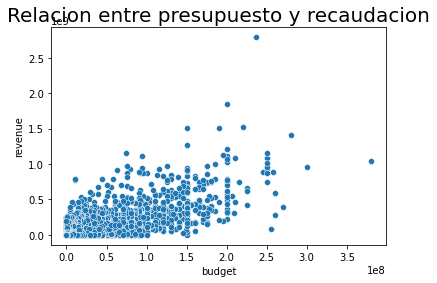

In [25]:
#se visualiza la relacion proporcional entre el presupuesto y la recaudacion

sns.scatterplot(x="budget", y="revenue", data=df_movies)
plt.title('Relacion entre presupuesto y recaudacion', fontsize = 20, fontweight = 30)

In [ ]:
#Aqui podemos notar como, casi logicamente, como a mayor presupuesto hay una mayor recaudacion aunque se estanca 
#despues de los 200 millones obteniendo casi una recaudacion poco variable. Podriamos con esto, decir que el mayor presupuesto
#no es lo mejor pero tampoco escatimar en este.

C:\Users\Rodrigo\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


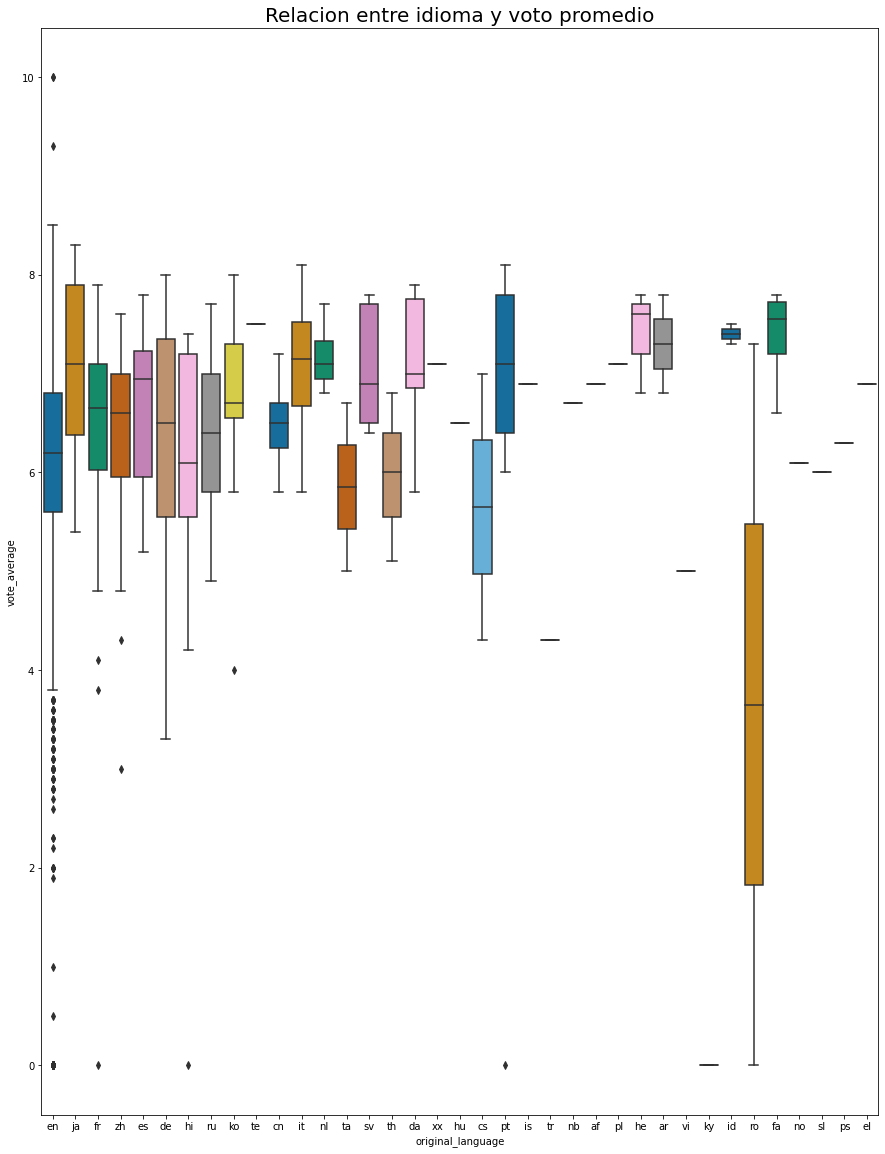

In [26]:
plt.rcParams['figure.figsize'] = (15,20)
sns.boxplot(df_movies['original_language'], df_movies['vote_average'], palette = 'colorblind')
plt.title('Relacion entre idioma y voto promedio', fontsize = 20, fontweight = 30)
plt.show()

In [ ]:
#con esta relacion trataremos de indagar cuales son los idiomas mejor recibidos en las peliculas, donde el predominante ingles
#no parece ser la mejor eleccion. Aun hay muchas variables mas para analizar pero es un punto interesante.

Text(0.5, 1.0, 'Relacion entre cantidad de votos, popularidad y lenguaje original')

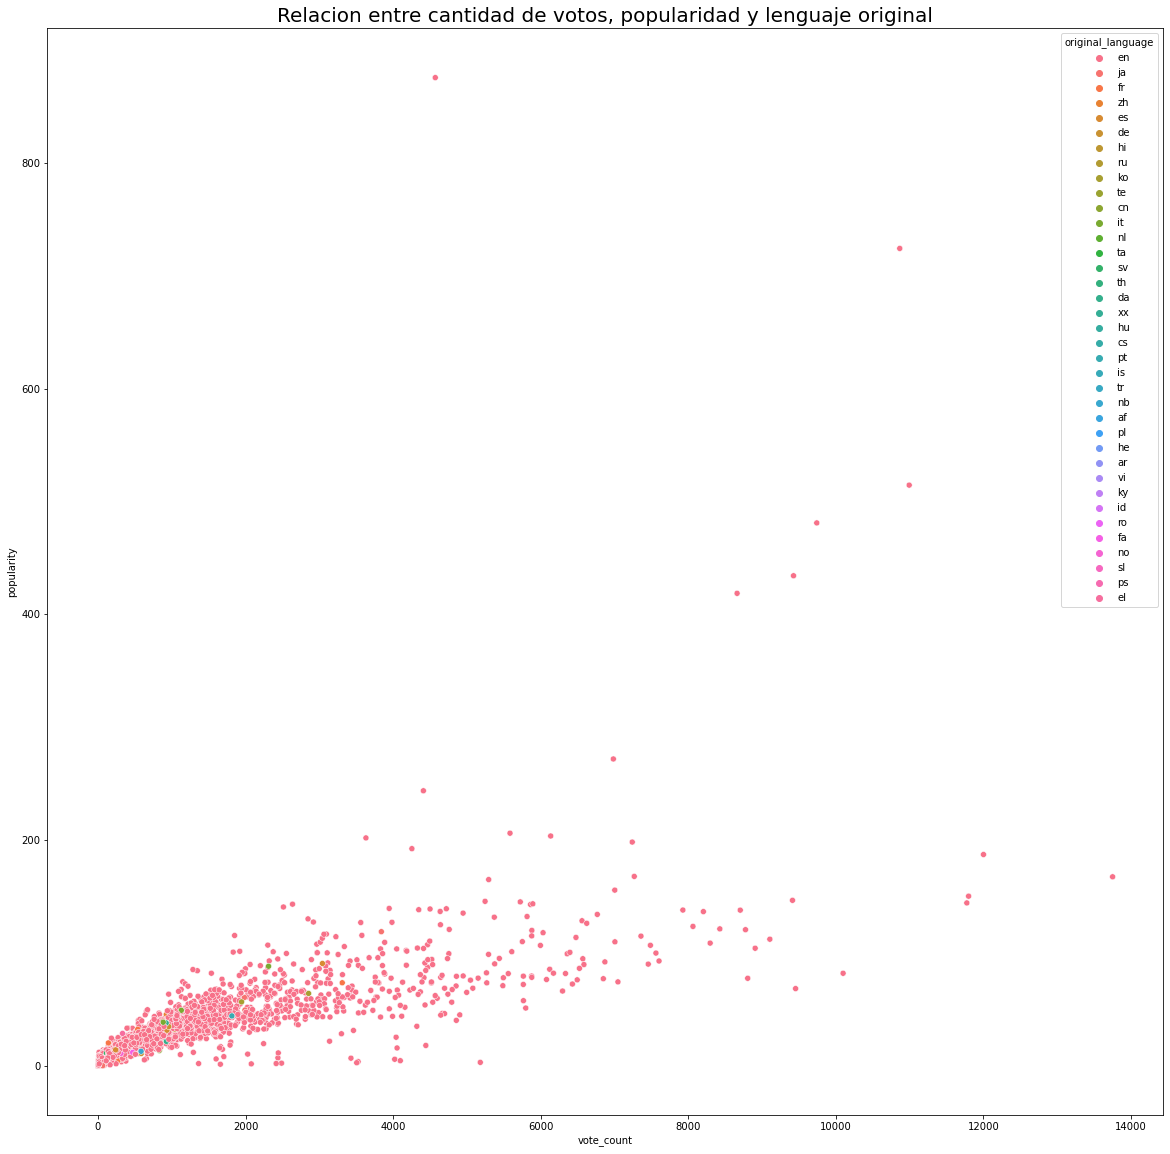

In [27]:
plt.figure(figsize=(20,20))
sns.scatterplot(x="vote_count", y="popularity", data=df_movies, hue='original_language')
plt.title('Relacion entre cantidad de votos, popularidad y lenguaje original', fontsize = 20, fontweight = 30)

In [ ]:
#Aqui se observa, nuevamente analizando del lenguanje original de la pelicula, donde la gente tiene mas aficion para puntuar
#las peliculas lo que genera una mayor popularidad de las mismas. Aunque tambien es cierto que el ingles suele tener mas
#alcance que los demas idiomas al ser el universal.

Text(0.5, 1.0, 'Relacion entre presupuesto, recaudacion y el lenguaje original')

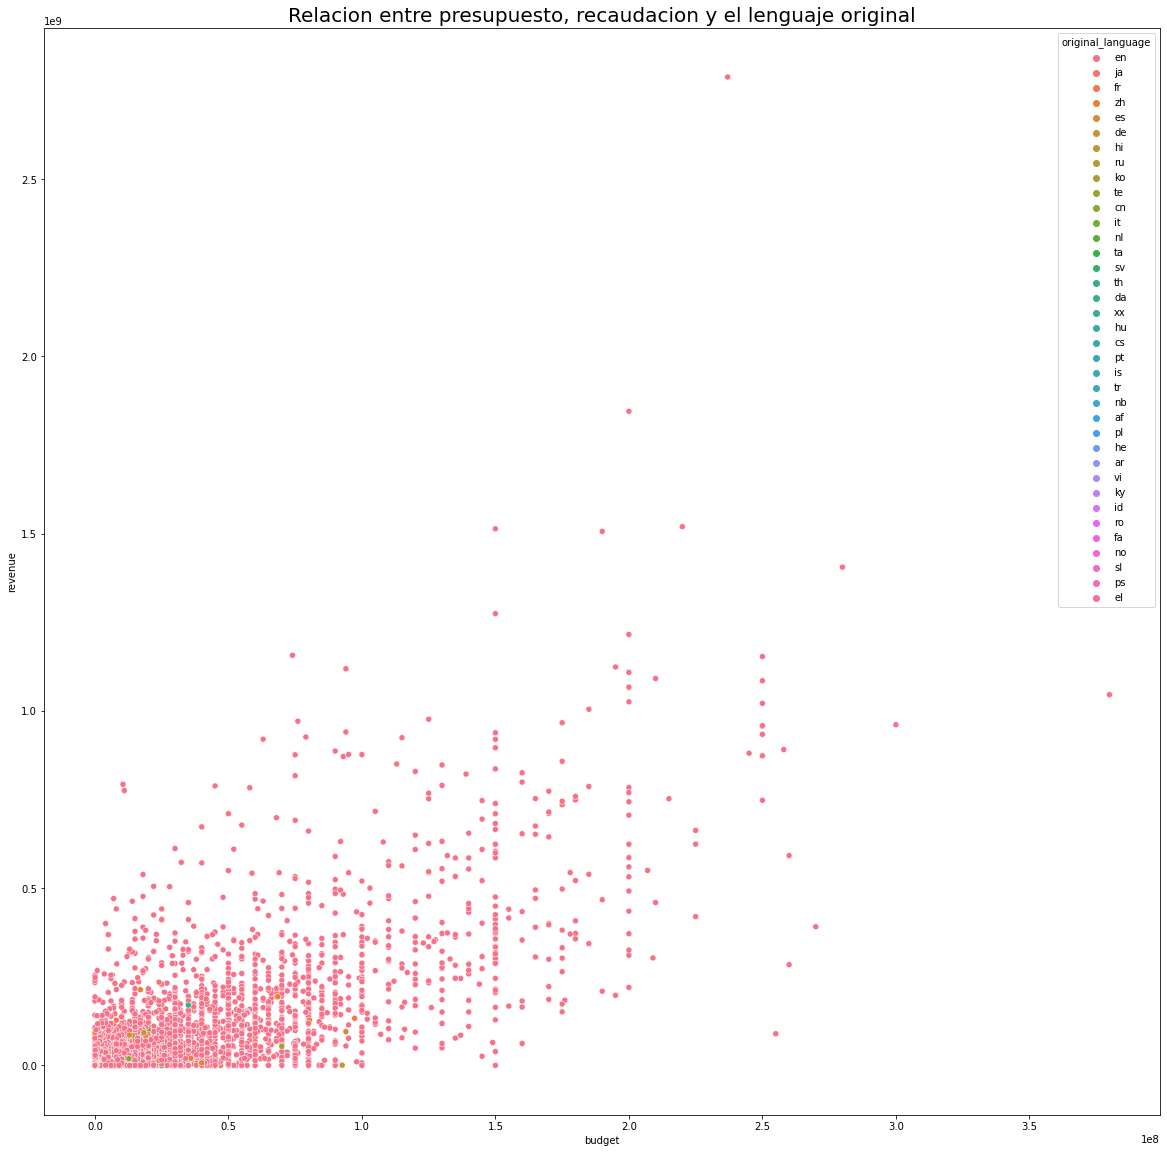

In [28]:
plt.figure(figsize=(20,20))
sns.scatterplot(x="budget", y="revenue", data=df_movies, hue='original_language')
plt.title('Relacion entre presupuesto, recaudacion y el lenguaje original', fontsize = 20, fontweight = 30)

In [ ]:
#Mismo analisis del lenguaje de pelicula pero esta vez con foco en el presupuesto abocado en el filme y la recaudacion
#consecuente del mismo. Mayor predominancia del ingles y el japones.
#(probablemente con un grafico mas interactivo se podria dilucidar mejor debido a la gran cantidad de variables)

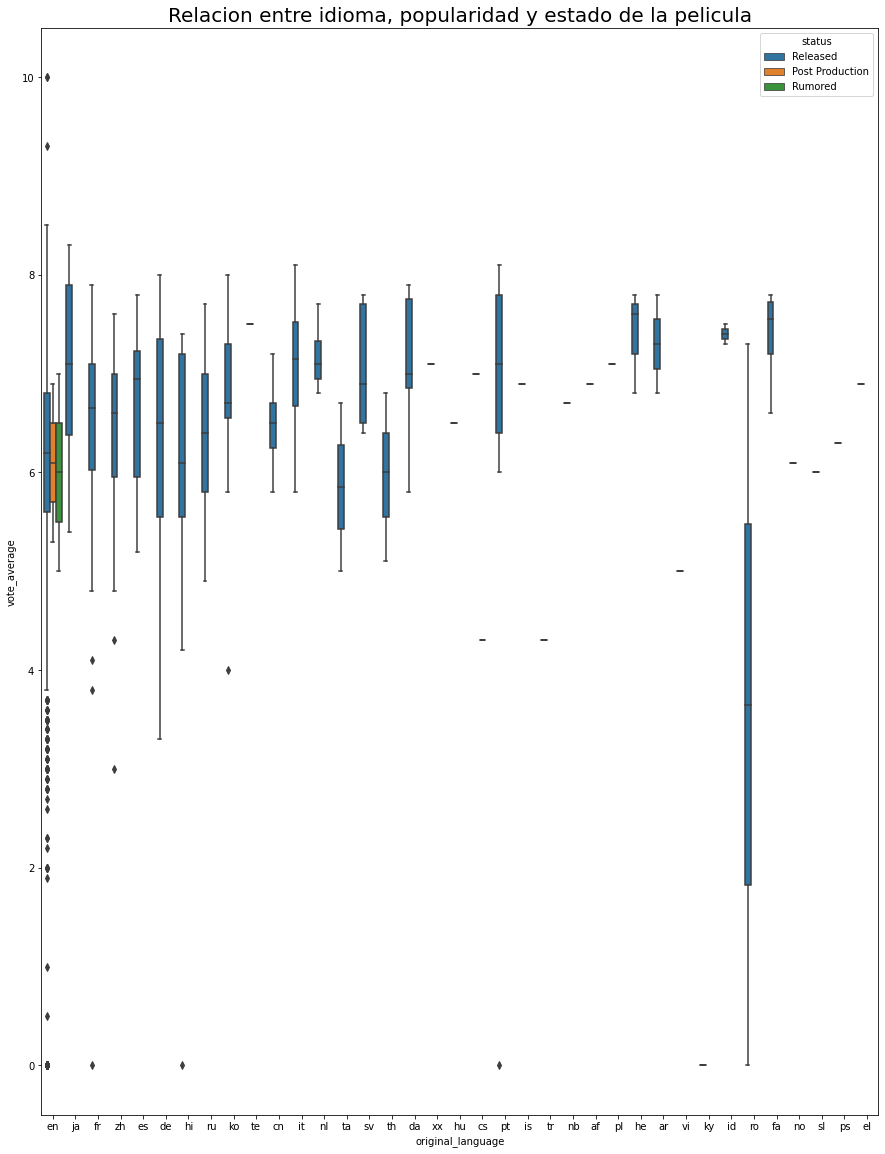

In [29]:
plt.figure(figsize=(15,20))
sns.boxplot(x='original_language', y='vote_average', data=df_movies, hue='status')
plt.title('Relacion entre idioma, popularidad y estado de la pelicula', fontsize = 20, fontweight = 30)
plt.show()

In [ ]:
#Un grafico para medir la popularidad de las peliculas en base a su lenguaje original como se venia trabajando con los
#anteriores con una pequeño analisis del estado en el que se encuentra la pelicula sobre como influyen posibles rumores
#de las mismas por ejemplo.